# Network Analysis 실습
### 이번 실습 시간에는 Wikipedia 하이퍼링크 네트워크를 이용한 Network Analysis 실습을 해볼 예정

# 1.1 Wikipedia Hyperlink Network
## - 위키피디아 문서들을 노드로, 문서 간 하이퍼링크를 간선(edge)으로 구성한 거대한 그래프 데이터셋
## - 간선에 방향이 있는 방향 그래프(directed graph)이며, 시작 노드의 문서에 끝 노드의 문서로 가는 링크가 들어 있는 경우에 간선이 연결되어 있음.
## - 노드의 수는 4,604개이며 간선의 수는 119,882개의개로 이루어져 있다.


In [ ]:
!wget https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
!tar xvfz wikispeedia_paths-and-graph.tar.gz

--2025-11-19 03:36:38--  https://snap.stanford.edu/data/wikispeedia/wikispeedia_paths-and-graph.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9901821 (9.4M) [application/x-gzip]
Saving to: ‘wikispeedia_paths-and-graph.tar.gz’

wikispeedia_paths-a 100%[===================>]   9.44M  3.13MB/s    in 3.0s    

2025-11-19 03:36:41 (3.13 MB/s) - ‘wikispeedia_paths-and-graph.tar.gz’ saved [9901821/9901821]

wikispeedia_paths-and-graph/
wikispeedia_paths-and-graph/paths_finished.tsv
wikispeedia_paths-and-graph/paths_unfinished.tsv
wikispeedia_paths-and-graph/articles.tsv
wikispeedia_paths-and-graph/categories.tsv
wikispeedia_paths-and-graph/links.tsv
wikispeedia_paths-and-graph/shortest-path-distance-matrix.txt


# 1.2 데이터 확인
## -` !head -n ?? 파일명`과 같은 식으로 명령어를 주면 파일에 저장되어 있는 글을 위에서부터 ?? 줄 만큼 출력

In [ ]:
!head -n 20 wikispeedia_paths-and-graph/articles.tsv
!head -n 20 wikispeedia_paths-and-graph/links.tsv


# The list of all articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   article
#
# When publishing on this data set, please cite:
# (1) Robert West and Jure Leskovec:
#     Human Wayfinding in Information Networks.
#     21st International World Wide Web Conference (WWW), 2012.
# (2) Robert West, Joelle Pineau, and Doina Precup:
#     Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts.
#     21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
%C3%85land
%C3%89douard_Manet
%C3%89ire
%C3%93engus_I_of_the_Picts
%E2%82%AC2_commemorative_coins
10th_century
11th_century
# The list of all links between articles.
# Article names are URL-encoded; e.g., in Java they can be decoded using java.net.URLDecoder.decode(articleName, "UTF-8").
# FORMAT:   linkSource   linkTarget
#
# When publishing on this data set, please cite

#1.3 그래프 생성
## - networkx package를 이용해서 articles.tsv에 있는 문서들을 노드로 links.tsv에 있는 링크들을 간선으로 만들어 그래프 생성

In [ ]:
import networkx as nx
from urllib.parse import unquote

G = nx.DiGraph()

with open("wikispeedia_paths-and-graph/articles.tsv") as f:

  for line in f:
    line = line.strip()
    if line == "" or line[0] == '#': continue
    node = unquote(line)

    G.add_node(node)

with open("wikispeedia_paths-and-graph/links.tsv") as f:
  for line in f:
    line = line.strip()
    if line == "" or line[0] == "#": continue

    u,v = line.split()
    u = unquote(u)
    v = unquote(v)

    G.add_edge(u,v)


# 1.4 Basic Statistics
## - node들을 반환하는 함수 ```nodes```
## - edge들을 반환하는 함수 ```edges```
## - 그래프에서 세 개의 노드가 서로 연결되어 있는 경우에 대해서 count를 해주는 함수 ```triangles```
## - 그래프의 간선의 농도를 측정해주는 함수 ```density```

In [ ]:
n_nodes = len(G.nodes)
n_edges = len(G.edges)
n_triangles = sum(nx.triangles(G.to_undirected()).values()) // 3
density = nx.density(G)

print("# nodes:", n_nodes)
print("# edges:", n_edges)
print("Density:", density)
print("# triangles:", n_triangles)

# nodes: 4604
# edges: 119882
Density: 0.0056568894271159615
# triangles: 550545


# 1.5 Centrality 계산
## - networkx package의 함수들을 이용하여 다양한 centrality 계산

In [ ]:
degree = nx.degree_centrality(G)
indegree = nx.in_degree_centrality(G)
outdegree = nx.out_degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
page_rank = nx.pagerank(G)
clustering = nx.clustering(G)
triangles = nx.triangles(G.to_undirected())

# 1.6 각 Centrality 별 내림차순 출력을 통해 각 centrality 기준 중요한 점을 출력

In [ ]:
print("Deg Rank")
for line in sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("In-Deg Rank")
for line in sorted(indegree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Out-Deg Rank")
for line in sorted(outdegree.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Betweenness Rank")
for line in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Closeness Rank")
for line in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Page Rank")
for line in sorted(page_rank.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Clustering Rank")
for line in sorted(clustering.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

print("Triangles Rank")
for line in sorted(triangles.items(), key=lambda x: x[1], reverse=True)[:10]:
  print(line)

Deg Rank
('United_States', 0.40082554855529)
('United_Kingdom', 0.24766456658700847)
('Europe', 0.23723658483597654)
('France', 0.2268086030849446)
('England', 0.2005213990875516)
('Germany', 0.19813165326960677)
('World_War_II', 0.18900716923745384)
('English_language', 0.15555072778622636)
('India', 0.1503367369107104)
('Africa', 0.1496849880512709)
In-Deg Rank
('United_States', 0.3369541603302194)
('United_Kingdom', 0.21116663045839668)
('France', 0.20834238540082553)
('Europe', 0.20269389528568324)
('England', 0.16315446447968715)
('World_War_II', 0.16315446447968715)
('Germany', 0.16141646752118183)
('India', 0.132739517705844)
('English_language', 0.12991527264827285)
('London', 0.12752552683032803)
Out-Deg Rank
('United_States', 0.0638713882250706)
('Driving_on_the_left_or_right', 0.05539865305235715)
('List_of_countries', 0.05300890723441234)
('List_of_circulating_currencies', 0.051270910275907015)
('List_of_sovereign_states', 0.04692591787964371)
('Africa', 0.04605691940039105

# 1.7 다양한 centrality 사이 관계 분석
## - 각 centrality 결과를 리스트 형식으로 변환 후 scatter plot을 이용하여 관계 분석

In [ ]:
nodes = G.nodes

dg_arr = [degree[node] for node in nodes]
id_arr = [indegree[node] for node in nodes]
od_arr = [outdegree[node] for node in nodes]
bw_arr = [betweenness[node] for node in nodes]
cl_arr = [closeness[node] for node in nodes]
pg_arr = [page_rank[node] for node in nodes]
cc_arr = [clustering[node] for node in nodes]
tr_arr = [triangles[node] for node in nodes]

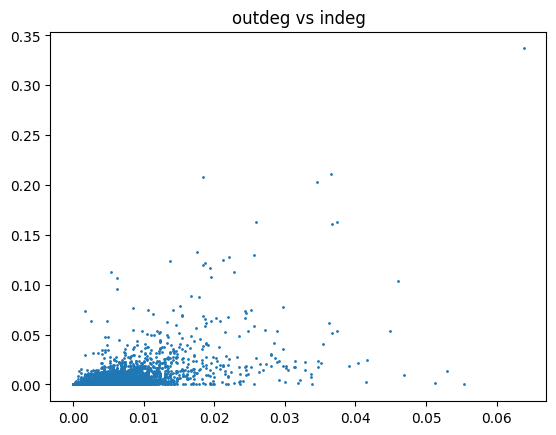

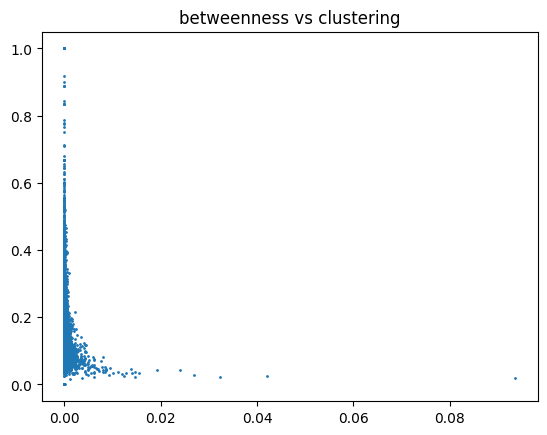

In [ ]:
import matplotlib.pyplot as plt

plt.title("outdeg vs indeg")
plt.scatter(od_arr, id_arr, s=1)
plt.show()

plt.title("betweenness vs clustering")
plt.scatter(bw_arr, cc_arr, s=1)
plt.show()

# 1.8 Seaborn을 사용하여 간단하게 그리기

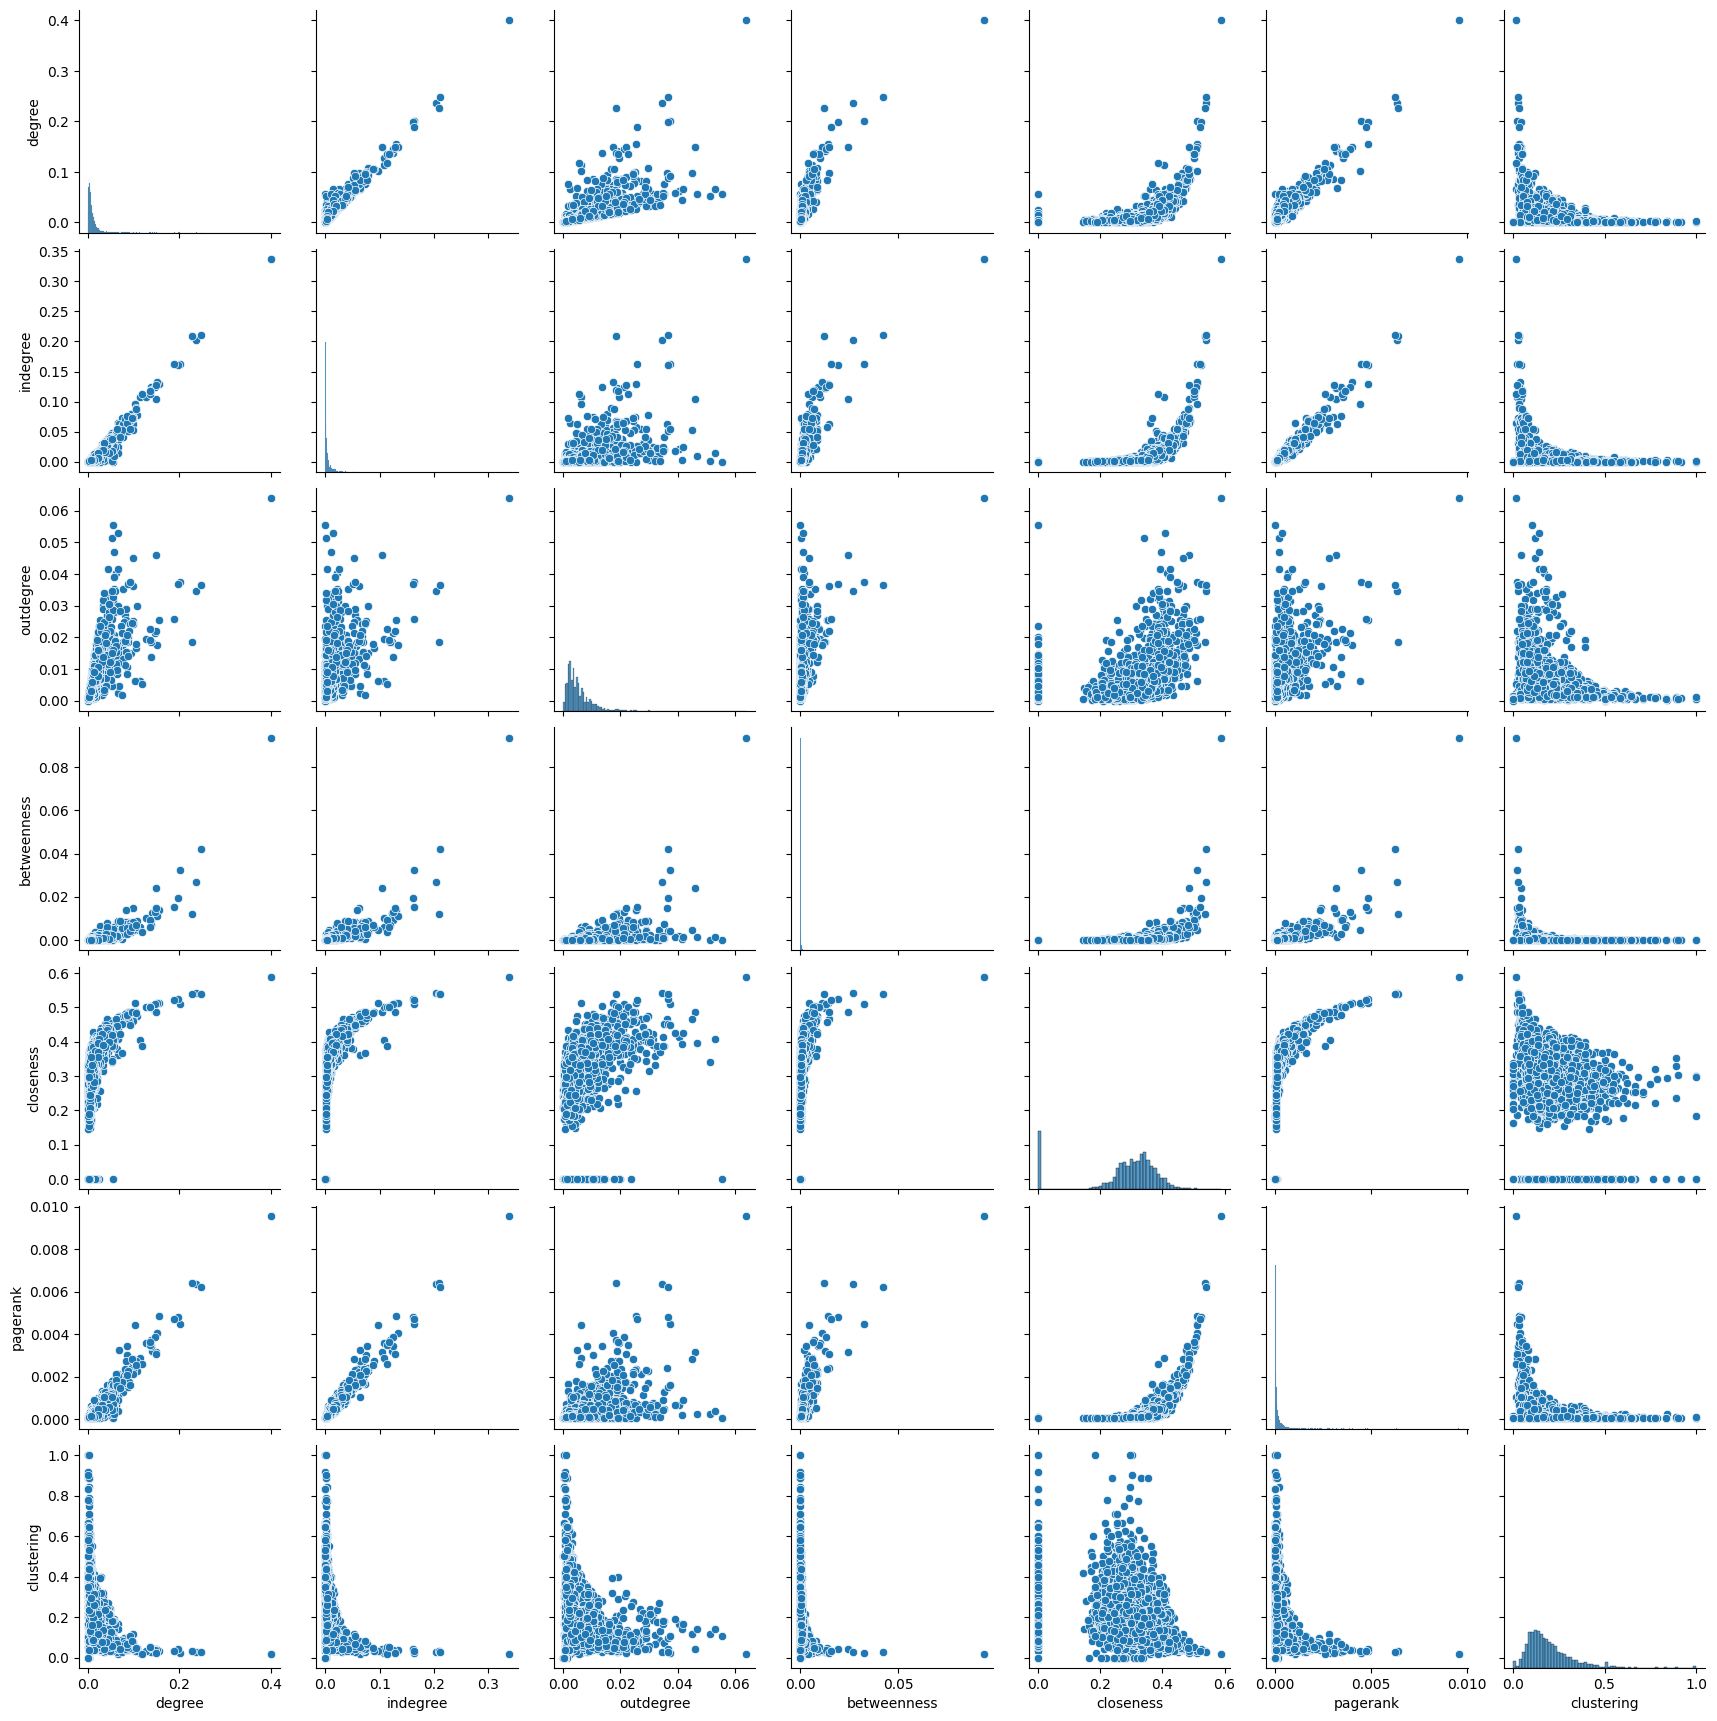

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

a = np.array([dg_arr, id_arr, od_arr, bw_arr, cl_arr, pg_arr, cc_arr]).T
df = pd.DataFrame(a, columns=["degree", "indegree", "outdegree", "betweenness", "closeness", "pagerank", "clustering"])
sns.pairplot(df)
plt.show()